# Project 2: Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mushrooms.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
np.random.seed(6)
for i in range(6):
    col = np.random.randint(22)
    n = np.random.uniform(0, 0.1)
    df.loc[df.sample(frac=n).index, df.columns[col]] = np.nan

Dealing with na values

In [4]:
df = df[df.isnull().sum(axis=1) < 2]

In [5]:
df[['cap-shape','cap-surface','bruises','gill-attachment','stalk-shape','veil-color']].describe()

,cap-shape,cap-surface,bruises,gill-attachment,stalk-shape,veil-color
count,7576,7152,7556,7196,7173,7623
unique,6,4,2,2,2,4
top,x,y,f,f,t,w
freq,3410,2834,4430,7007,4068,7435


In [6]:
df['gill-attachment'].fillna(value='f',inplace=True)
df['veil-color'].fillna(value='w',inplace=True)

# data preprocessing

In [7]:
df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6240 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     6240 non-null   object
 1   cap-shape                 6240 non-null   object
 2   cap-surface               6240 non-null   object
 3   cap-color                 6240 non-null   object
 4   bruises                   6240 non-null   object
 5   odor                      6240 non-null   object
 6   gill-attachment           6240 non-null   object
 7   gill-spacing              6240 non-null   object
 8   gill-size                 6240 non-null   object
 9   gill-color                6240 non-null   object
 10  stalk-shape               6240 non-null   object
 11  stalk-root                6240 non-null   object
 12  stalk-surface-above-ring  6240 non-null   object
 13  stalk-surface-below-ring  6240 non-null   object
 14  stalk-color-above-ring  

In [8]:
df_class = df_cleaned['class']
del df_cleaned['class']

In [9]:
dummies = pd.get_dummies(df_cleaned)
final_df = dummies.join(df_class)

In [10]:
final_df['class']= final_df['class'].map({'e':2, 'p':1})

In [11]:
y = final_df['class']
X = final_df.drop('class', axis=1)

In [12]:
# splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# 2 models with Voting Classifier#

In [13]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [14]:
lr = LogisticRegression(random_state=1)
rf = RandomForestClassifier(random_state=1)

In [15]:
voting_clf_hard = VotingClassifier(estimators = [('LR',lr),('rf',rf)],voting = 'hard')
voting_clf_soft = VotingClassifier(estimators = [('LR',lr),('rf',rf)],voting = 'soft')

In [16]:
from sklearn.metrics import accuracy_score
for clf in (lr, rf, voting_clf_hard, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.9990291262135922
RandomForestClassifier 1.0
VotingClassifier 1.0
VotingClassifier 1.0


# bagging and pasting classifier

## Decision tree with bagging

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
bag_clf1 = BaggingClassifier(dt, n_estimators=500, max_samples=0.3, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf1.fit(X_train, y_train)
y_pred = bag_clf1.predict(X_test)

In [18]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9980582524271845


In [19]:
bag_clf1.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf1.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf1.score(X_test, y_test)))

Train score: 1.00
Test score: 1.00


In [110]:
X_b = X_train.iloc[:,2:4]
y_b = y_train

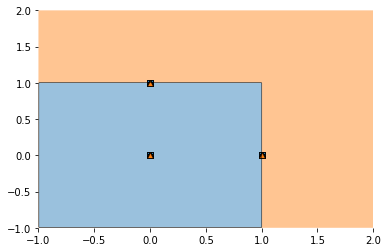

In [111]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
bag_clf1.fit(X_b, y_b) 
plot_decision_regions(X_b.values, y_b.values, clf=bag_clf1, legend=0)
plt.show()

all featurees included in above graph have only 2 values '0' and '1' hence all data points overlapped each other and looks like only 3 data points but in reality they are multiple datapoints

## lenior regression classifier with bagging

In [20]:

bag_clf2 = BaggingClassifier(lr, n_estimators=500, max_samples=0.3, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf2.fit(X_train, y_train)
y_pred = bag_clf2.predict(X_test)

In [21]:
print(accuracy_score(y_test, y_pred))

0.996116504854369


In [22]:
bag_clf2.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf2.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf2.score(X_test, y_test)))

Train score: 1.00
Test score: 1.00


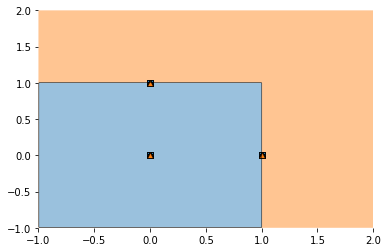

In [112]:
bag_clf2.fit(X_b, y_b)
plot_decision_regions(X_b.values, y_b.values, clf=bag_clf2, legend=0)
plt.show()

## decision tree with pasting

In [23]:
pasting_clf1 = BaggingClassifier(dt, n_estimators=500, max_samples=0.3, bootstrap=False, n_jobs=-1, random_state=0)

pasting_clf1.fit(X_train, y_train)
y_pred = pasting_clf1.predict(X_test)

In [24]:
print(accuracy_score(y_test, y_pred))

0.9985436893203884


In [25]:
pasting_clf1.fit(X_train, y_train)
print('Train score: {:.2f}'.format(pasting_clf1.score(X_train, y_train)))
print('Test score: {:.2f}'.format(pasting_clf1.score(X_test, y_test)))

Train score: 1.00
Test score: 1.00


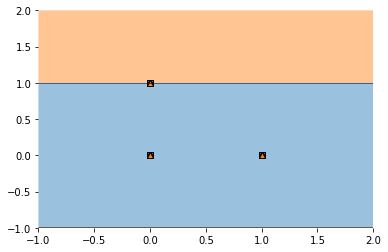

In [114]:
pasting_clf1.fit(X_b, y_b)
plot_decision_regions(X_b.values, y_b.values, clf=pasting_clf1, legend=0)
plt.show()

## linear regression with pasting

In [26]:
pasting_clf2 = BaggingClassifier(lr, n_estimators=500, max_samples=0.3, bootstrap=False, n_jobs=-1, random_state=0)

pasting_clf2.fit(X_train, y_train)
y_pred = pasting_clf2.predict(X_test)

In [27]:
print(accuracy_score(y_test, y_pred))

0.9966019417475728


In [28]:
pasting_clf2.fit(X_train, y_train)
print('Train score: {:.2f}'.format(pasting_clf2.score(X_train, y_train)))
print('Test score: {:.2f}'.format(pasting_clf2.score(X_test, y_test)))

Train score: 1.00
Test score: 1.00


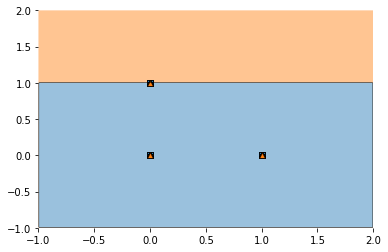

In [115]:
pasting_clf2.fit(X_b, y_b)
plot_decision_regions(X_b.values, y_b.values, clf=pasting_clf2, legend=0)
plt.show()

# Adaboosting

## decision tree with adaboosting

In [31]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf1 = AdaBoostClassifier(dt, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [32]:
ada_clf2 = AdaBoostClassifier(lr, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=1,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=0.5, n_estimators=200, random_state=0)

# GradientBoosting

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.906
Accuracy score (validation): 0.906
Learning rate:  0.075
Accuracy score (training): 0.913
Accuracy score (validation): 0.909
Learning rate:  0.1
Accuracy score (training): 0.914
Accuracy score (validation): 0.909
Learning rate:  0.25
Accuracy score (training): 0.933
Accuracy score (validation): 0.928
Learning rate:  0.5
Accuracy score (training): 0.974
Accuracy score (validation): 0.973
Learning rate:  0.75
Accuracy score (training): 0.979
Accuracy score (validation): 0.975
Learning rate:  1
Accuracy score (training): 0.977
Accuracy score (validation): 0.971


<IPython.core.display.Javascript object>


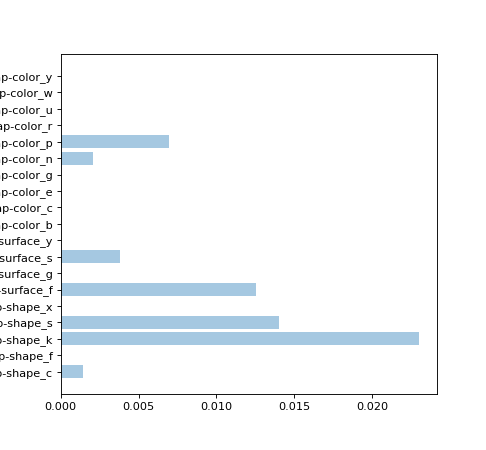

([<matplotlib.axis.YTick at 0x26f38d07788>,
 <a list of 19 Text yticklabel objects>)

In [39]:
%matplotlib notebook

y_list = gb_clf.feature_importances_[1:20]
y_pos = np.arange(len(y_list))
features = X.columns[1:20]
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

# Model with pca

In [41]:
from sklearn.decomposition import PCA
pca_alg = PCA(0.95)
x_train_reduced = pca_alg.fit_transform(X_train)
x_test_reduced = pca_alg.transform(X_test)
x_reduced = pca_alg.transform(X)

## knn with pca

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='roc_auc')
grid_knn.fit(x_train_reduced, y_train)
grid_knn.score(x_train_reduced, y_train)

0.9999989687121001

In [43]:
grid_knn.score(x_test_reduced, y_test)

0.9999999999999999

In [44]:
grid_knn.best_params_

{'n_neighbors': 10}

In [45]:
cv_results = pd.DataFrame.from_dict(grid_knn.cv_results_)
cv_results[['param_n_neighbors','mean_test_score']]

,param_n_neighbors,mean_test_score
0,1,0.999505
1,5,0.999750
2,10,0.999995
3,15,0.999991
4,20,0.999986


In [46]:
from sklearn.metrics import roc_auc_score
y_knn_predict = grid_knn.predict(x_test_reduced)
y_knn_train_predict = grid_knn.predict(x_train_reduced)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, y_test))

Train roc_auc_score: 1.00
Test roc_auc_score: 1.00 


In [47]:
knn_cmatrix = confusion_matrix(y_test, y_knn_predict)
print (knn_cmatrix)

[[ 994    5]
 [   0 1061]]


In [48]:
report_table =[['knn', 'k = 10', grid_knn.score(x_train_reduced, y_train), grid_knn.score(x_test_reduced, y_test), roc_auc_score(y_knn_train_predict, y_train), roc_auc_score(y_knn_predict, y_test) ]]

## logistic regression with pca

In [49]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C':[0.01, 0.1, 1, 10, 100]}

logis_reg = LogisticRegression(solver='liblinear',multi_class='auto')

grid_log = GridSearchCV(logis_reg, param_grid = param_grid, cv = 5)
grid_log.fit(x_train_reduced, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [50]:
cv_results = pd.DataFrame.from_dict(grid_log.cv_results_)
cv_results[['params','mean_test_score']]

,params,mean_test_score
0,{'C': 0.01},0.971770
1,{'C': 0.1},0.981100
2,{'C': 1},0.992584
3,{'C': 10},0.997129
4,{'C': 100},0.999761


In [51]:
from sklearn.metrics import roc_auc_score
y_log_predict = grid_log.predict(x_test_reduced)
y_log_train_predict = grid_log.predict(x_train_reduced)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_log_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_log_predict, y_test))

Train roc_auc_score: 1.00
Test roc_auc_score: 1.00 


In [52]:
log_cmatrix = confusion_matrix(y_test, y_log_predict)
print (log_cmatrix)

[[ 999    0]
 [   0 1061]]


In [53]:
report_table = report_table+[['Logistic', 'C = 100', grid_log.score(x_train_reduced, y_train), grid_log.score(x_test_reduced, y_test), roc_auc_score(y_log_train_predict, y_train), roc_auc_score(y_log_predict, y_test) ]]

## svm kernal rbf linear

In [54]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
grid_svc = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [0.01,0.1,1,10,100],
    'kernel': ['linear','rbf']
}, cv=5, return_train_score=True)
grid_svc.fit(x_reduced,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [55]:
df = pd.DataFrame(grid_svc.cv_results_)
df[['param_C','param_kernel','mean_train_score','mean_test_score']]

,param_C,param_kernel,mean_train_score,mean_test_score
0,0.01,linear,0.983253,0.856891
1,0.01,rbf,0.911258,0.890865
2,0.1,linear,0.992989,0.895353
3,0.1,rbf,0.981130,0.841827
4,1,linear,0.998277,0.949679
5,1,rbf,0.997837,0.893429
6,10,linear,1.000000,0.965224
7,10,rbf,1.000000,0.935577
8,100,linear,1.000000,0.969071
9,100,rbf,1.000000,0.936378


In [56]:
y_svc_predict_train = grid_svc.predict(x_train_reduced)
y_svc_predict = grid_svc.predict(x_test_reduced)

In [57]:
svc_cmatrix = confusion_matrix(y_test, y_svc_predict)
print (svc_cmatrix)

[[ 999    0]
 [   0 1061]]


In [58]:
report_table = report_table + [['SVC linear Kernalized : linear', 'C = 100', grid_svc.score(x_train_reduced, y_train), grid_svc.score(x_test_reduced, y_test), roc_auc_score(y_svc_predict_train, y_train), roc_auc_score(y_svc_predict, y_test)]]

## svmpoly with pca

In [59]:
svc_poly = svm.SVC(degree = 3) 
param_grid = {'C':[0.01, 0.1, 1, 10]}

grid_svcPoly = GridSearchCV(svc_poly, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='roc_auc')
grid_svcPoly.fit(x_train_reduced, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [60]:
print("Best cross-validation score: {:.2f}".format(grid_svcPoly.best_score_))
print('Best parameters term:',grid_svcPoly.best_params_)
print("Training Score: {:.4f}".format(grid_svcPoly.score(x_train_reduced, y_train)))
print("Testing Score: {:.4f}".format(grid_svcPoly.score(x_test_reduced, y_test)))

Best cross-validation score: 1.00
Best parameters term: {'C': 1}
Training Score: 1.0000
Testing Score: 1.0000


In [61]:
df = pd.DataFrame(grid_svcPoly.cv_results_)
df[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.01,0.994612
1,0.1,0.999939
2,1,1.000000
3,10,1.000000


In [62]:
y_svcPoly_predict_train = grid_svcPoly.predict(x_train_reduced)
y_svcPoly_predict = grid_svcPoly.predict(x_test_reduced)

In [63]:
svcPoly_cmatrix = confusion_matrix(y_test, y_svcPoly_predict)
print (svcPoly_cmatrix)

[[ 999    0]
 [   0 1061]]


In [64]:
report_table = report_table + [['SVC Poly', 'C = 1', grid_svcPoly.score(x_train_reduced, y_train), grid_svcPoly.score(x_test_reduced, y_test), roc_auc_score(y_svcPoly_predict_train, y_train), roc_auc_score(y_svcPoly_predict, y_test)]]

## linear svm  with pca

In [65]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)

In [66]:
grid_svc_lin.fit(x_train_reduced, y_train)

C:\Users\ray19\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [67]:
y_svc_lin_predict_train = grid_svc_lin.predict(x_train_reduced)
y_svc_lin_predict = grid_svc_lin.predict(x_test_reduced)

In [68]:
df = pd.DataFrame(grid_svc_lin.cv_results_)
df[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.995402
1,0.01,0.998200
2,0.1,0.999379
3,1,0.999995
4,10,1.000000
5,100,1.000000


In [69]:
svc_lin_cmatrix = confusion_matrix(y_test, y_svc_lin_predict)
print (svc_lin_cmatrix)

[[ 999    0]
 [   0 1061]]


In [70]:
report_table = report_table + [['LinearSVC', 'C = 10', grid_svc_lin.score(x_train_reduced, y_train), grid_svc_lin.score(x_test_reduced, y_test), roc_auc_score(y_svc_lin_predict_train, y_train), roc_auc_score(y_svc_lin_predict, y_test)]]

## decision tree with pca

In [71]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth':[1, 2, 3, 4, 5, 6]}
dtree = DecisionTreeClassifier()

grid_tree = GridSearchCV(dtree, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)
grid_tree.fit(x_train_reduced, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
             pre_di

In [72]:
df = pd.DataFrame(grid_tree.cv_results_)
df[['params','mean_test_score']]

,params,mean_test_score
0,{'max_depth': 1},0.890702
1,{'max_depth': 2},0.977584
2,{'max_depth': 3},0.988726
3,{'max_depth': 4},0.992081
4,{'max_depth': 5},0.992624
5,{'max_depth': 6},0.992854


In [73]:
y_dtree_predict_train = grid_tree.predict(x_train_reduced)
y_dtree_predict = grid_tree.predict(x_test_reduced)

In [74]:
dtree_cmatrix = confusion_matrix(y_test, y_dtree_predict)
print (dtree_cmatrix)

[[ 984   15]
 [   0 1061]]


In [75]:
report_table = report_table + [['Decision Tree', 'max_depth = 6', grid_tree.score(x_train_reduced, y_train), grid_tree.score(x_test_reduced, y_test), roc_auc_score(y_dtree_predict_train, y_train), roc_auc_score(y_dtree_predict, y_test)]]

In [76]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy(pca)', 'Test accuracy(pca)', 'Train auc score(pca)', 'Test auc score(pca)'])

In [77]:
df = pd.read_csv("project1_result.csv")

# Comparison of models 

## without pca

In [78]:
df

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,knn,k = 15,1.000000,1.000000,0.999537,0.997655
1,Logistic,C = 1,0.999761,0.999029,0.999768,0.999059
2,SVC linear Kernalized,C = 1,1.000000,1.000000,1.000000,1.000000
3,SVC Poly,C = 1,1.000000,1.000000,1.000000,1.000000
4,LinearSVC,C = 0.01,0.999940,0.999870,0.998383,0.996258
5,Decision Tree,max_depth = 6,0.999597,0.998337,0.999075,0.996723


## with pca

In [79]:
report

,Model name,Model parameter,Train accuracy(pca),Test accuracy(pca),Train auc score(pca),Test auc score(pca)
0,knn,k = 10,0.999999,1.000000,0.999306,0.997655
1,Logistic,C = 100,1.000000,1.000000,1.000000,1.000000
2,SVC linear Kernalized : linear,C = 100,1.000000,1.000000,1.000000,1.000000
3,SVC Poly,C = 1,1.000000,1.000000,1.000000,1.000000
4,LinearSVC,C = 10,1.000000,1.000000,1.000000,1.000000
5,Decision Tree,max_depth = 6,0.997970,0.991451,0.997923,0.993030


as we can see from above tables that most of models have improved accuracy with pca except decision tree and knn classifier

# neural network

In [80]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

Using TensorFlow backend.
C:\Users\ray19\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ray19\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ray19\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ray19\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [81]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=117, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [82]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [83]:
grid_search_result = grid_search.fit(X, y)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [116]:
df = pd.DataFrame(grid_search_result.cv_results_)
df.iloc[:,[4,5,7,8,9,10,11,12,13]]

,param_batch_size,param_epochs,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,10,10,0.998397,1.0,1.0,1.000000,0.975160,0.994712,0.009795
1,10,50,1.000000,1.0,1.0,1.000000,0.990385,0.998077,0.003846
2,10,100,1.000000,1.0,1.0,1.000000,0.964744,0.992949,0.014103
3,20,10,0.993590,1.0,1.0,1.000000,0.980769,0.994872,0.007476
4,20,50,1.000000,1.0,1.0,1.000000,0.978365,0.995673,0.008654
5,20,100,1.000000,1.0,1.0,1.000000,0.987179,0.997436,0.005128
6,30,10,0.991987,1.0,1.0,0.998397,0.981571,0.994391,0.007059
7,30,50,1.000000,1.0,1.0,1.000000,0.975160,0.995032,0.009936
8,30,100,1.000000,1.0,1.0,1.000000,0.977564,0.995513,0.008974
9,40,10,0.994391,1.0,1.0,0.995994,0.978365,0.993750,0.008003
